### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Dataset first impressions

The listings.csv contains the data about the accomodations in the city

The other files, besides the calendar.csv, don't have much more useful information

In [2]:
mel_list = pd.read_csv('dataset/melbourne/listings.csv')

In [3]:
mel_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
mel_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20210410122555,2021-04-13,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.03
1,10803,https://www.airbnb.com/rooms/10803,20210410122555,2021-04-11,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/31323790/90b6...,38901,https://www.airbnb.com/users/show/38901,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.44
2,12936,https://www.airbnb.com/rooms/12936,20210410122555,2021-04-11,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,...,10.0,10.0,9.0,NaN,f,10,10,0,0,0.32
3,38271,https://www.airbnb.com/rooms/38271,20210410122555,2021-04-14,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.24
4,41836,https://www.airbnb.com/rooms/41836,20210410122555,2021-04-13,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,https://www.airbnb.com/users/show/182833,...,9.0,9.0,9.0,NaN,f,2,0,2,0,1.25


In [5]:
# mel_list_sm = pd.read_csv('dataset/melbourne/listings_small.csv')

In [6]:
# mel_list_sm.head()

In [7]:
mel_cal = pd.read_csv('dataset/melbourne/calendar.csv')

In [8]:
mel_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,534083,2021-04-12,f,$99.00,$99.00,1.0,1125.0
1,66754,2021-04-11,f,$94.00,$94.00,3.0,14.0
2,66754,2021-04-12,f,$94.00,$94.00,3.0,14.0
3,66754,2021-04-13,f,$94.00,$94.00,3.0,14.0
4,66754,2021-04-14,f,$94.00,$94.00,3.0,14.0


In [9]:
# mel_rev = pd.read_csv('dataset/melbourne/reviews.csv')

In [10]:
# mel_rev.head()

In [11]:
# mel_rev_sm = pd.read_csv('dataset/melbourne/reviews_small.csv')

In [12]:
# mel_rev_sm.head()

### Preparing the data

In [13]:
df = mel_list[:1000].copy()

In [29]:
sum(mel_list['host_listings_count'] != mel_list['host_total_listings_count'])

477

In [86]:
mel_list['has_availability'].value_counts()

t    18728
f       70
Name: has_availability, dtype: int64

In [88]:
mel_list['calendar_last_scraped'].value_counts()

2021-04-11    6174
2021-04-12    5956
2021-04-13    5421
2021-04-14     743
2021-04-10     308
2021-04-15     195
2021-04-16       1
Name: calendar_last_scraped, dtype: int64

In [97]:
### Getting the useful columns

### Removing data with a lot of missing values
df = mel_list.loc[:,(mel_list.isnull().sum() / mel_list.shape[0] <= .75)][:].copy()

### TO DO: Show the reasons to exclude some columns
df = df.drop(['listing_url','id','scrape_id','last_scraped','name',
              'description','neighborhood_overview','picture_url',
              'host_url','host_name', 'host_about','host_thumbnail_url',
              'host_picture_url','latitude','longitude','minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
              'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability',
              'calendar_last_scraped','calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms',], axis=1)
df.dtypes

host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_neighbourhood              object
host_listings_count            float64
host_total_listings_count      float64
host_verifications              object
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
neighbourhood_cleansed          object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
amenities                       object
price                           object
minimum_nights                   int64
maximum_nights                   int64
availability_30          

In [16]:
# Changing the price from string to float
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype('float')

In [17]:
df.describe()

,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.000000e+03,981.000000,981.000000,0.0,1000.000000,1000.000000,1000.000000,0.0,980.000000,995.000000,...,891.000000,891.000000,891.000000,890.000000,0.0,1000.000000,1000.000000,1000.000000,1000.000000,897.000000
mean,9.625959e+06,6.431193,6.431193,NaN,-37.828670,145.024334,3.329000,NaN,1.582653,1.982915,...,9.793490,9.812570,9.742985,9.435955,NaN,5.156000,4.412000,0.701000,0.011000,0.862330
std,1.468425e+07,17.798951,17.798951,NaN,0.066673,0.140548,2.207631,NaN,0.989374,1.822261,...,0.568857,0.599343,0.557022,0.832988,NaN,12.319555,12.367749,1.472334,0.104355,1.034449
min,9.082000e+03,0.000000,0.000000,NaN,-38.190040,144.666240,1.000000,NaN,1.000000,0.000000,...,4.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.598287e+06,1.000000,1.000000,NaN,-37.858218,144.966265,2.000000,NaN,1.000000,1.000000,...,10.000000,10.000000,10.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.150000
50%,7.004112e+06,1.000000,1.000000,NaN,-37.824680,144.986455,2.000000,NaN,1.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.490000
75%,1.386487e+07,3.000000,3.000000,NaN,-37.801057,145.015398,4.000000,NaN,2.000000,2.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,2.000000,1.000000,0.000000,1.170000
max,3.351309e+08,115.000000,115.000000,NaN,-37.586260,145.699150,16.000000,NaN,10.000000,16.000000,...,10.000000,10.000000,10.000000,10.000000,NaN,70.000000,70.000000,14.000000,1.000000,8.570000


In [18]:
df.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,33057,2009-08-21,AU,NaN,NaN,NaN,f,NaN,1.0,1.0,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.03
1,38901,2009-09-16,"Melbourne, Victoria, Australia",NaN,NaN,0%,f,Brunswick,1.0,1.0,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.44
2,50121,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,St Kilda,13.0,13.0,...,10.0,10.0,9.0,NaN,f,10,10,0,0,0.32
3,164193,2010-07-12,"Berwick, Victoria, Australia",within an hour,100%,82%,t,NaN,1.0,1.0,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.24
4,182833,2010-07-27,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,NaN,3.0,3.0,...,9.0,9.0,9.0,NaN,f,2,0,2,0,1.25


### Questions

#### What are the room types with more reviews?

In [19]:
grouped = df[['room_type','number_of_reviews']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.sum().values:
    y.append(val[0])

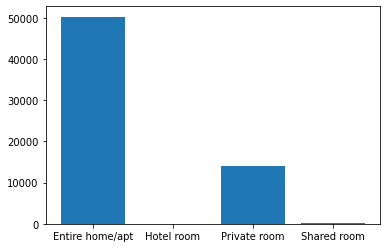

In [20]:
plt.bar(x, y);

#### Does the room’s type influence the rating?

In [21]:
grouped = df[['room_type','review_scores_rating']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.mean().values:
    y.append(val[0])

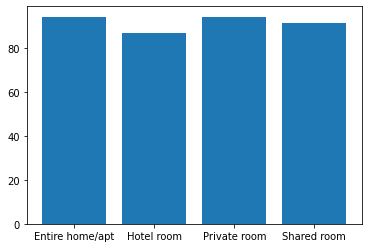

In [22]:
plt.bar(x, y);

In [23]:
### Probably has no influence in at the ratings

#### Does the room’s type influence the price?

In [24]:
grouped = df[['room_type','price']].groupby('room_type')
x = list(grouped.groups.keys())
y = []
for val in grouped.mean().values:
    y.append(val[0])

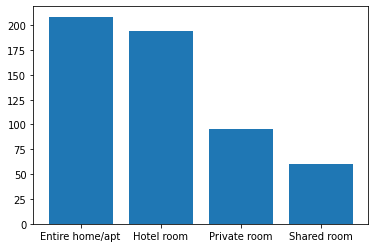

In [25]:
plt.bar(x, y);

#### Does the price correlate with the users' ratings?

In [26]:
n_bins = 20
df_filtered = df[df['review_scores_rating'] >= 0][['price','review_scores_rating']]
grouped = df_filtered.groupby(pd.cut(df_filtered['review_scores_rating'], bins=n_bins))

x = []
for group in list(grouped.groups.keys()):
    x.append(group.right)

y = []
for val in grouped.mean().values:
    y.append(val[0])

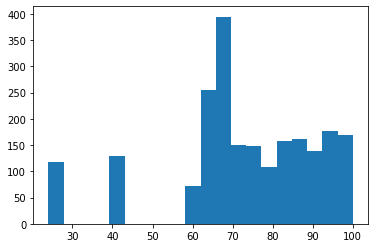

In [27]:
plt.hist(x, bins=n_bins, weights=y);

#### What are the variables that influence the price more?